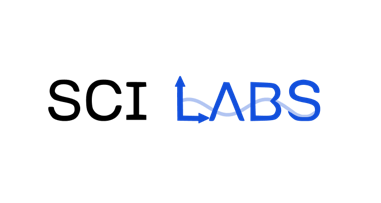

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Úloha - Vzdialenosť a zrychlenie prvého stupňa rakety Falcon 9

Údaje pre túto úlohu sú prevzaté z tohto [vlákna](https://www.reddit.com/r/spacex/comments/68onuw/nrol76_first_stage_temeter_data/) na sociálnej sieti Reddit. Užívateľ Tossha spracoval dáta zo štartu Falcon 9 (misia NROL-76). V tejto úlohe nakreslíme graf závislosti polohy a zrýchlenia v priebehu času pomocou základnej numerickej integrácie a derivácie z dostupných údajov o rýchlosti rakety.


In [ ]:
#importovanie dat (len prvé štyri stĺpce)

telemetry_data = pd.read_csv("NROL-76 F9 first stage telemetry data - Data.csv", usecols=["Frame", "Speed", "Altitude", "Time"])

#zdroj dat:
# https://www.reddit.com/r/spacex/comments/68onuw/nrol76_first_stage_telemetry_data/
# https://docs.google.com/spreadsheets/d/1ihRLDqwy95p-Y0bJ9YGfjQTt5ZRgwCu7xzmJ3fdRguo/edit?gid=0#gid=0

Popis načitaných dat:
- Frame - sériové číslo framu, z ktorého boli údaje získané,
- Speed $v$ [$\frac{\text{m}}{\text{s}}$] - aktuálna rýchlosť rakety,
- Altitude $y$ [km] - aktuálna výška rakety,
- Time $t$ [s] - čas

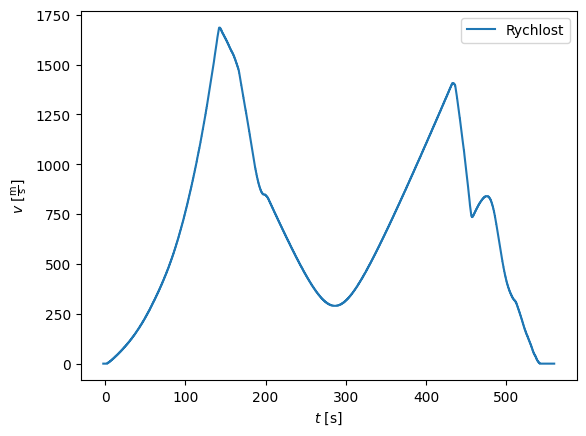

In [ ]:
#graf rychlosti v závislosti na čase

plt.plot(telemetry_data["Time"], telemetry_data["Speed"], label = "Rychlost")
plt.xlabel("$t$ [s]")
plt.ylabel(r"$v$ [$\frac{\text{m}}{\text{s}}$]")

plt.legend()

## Vzdialenosť urazená prvou fázou rakety Falcon 9

Kód nižšie je jeden z príkladov jednoduchej integrácie. Našu prácu si zjednodušíme tým predopkladom, že rýchlosť v jednom časovom intervale je konštantná. Čo to znamená? Počas časového intervalu $\Delta t_i = t_i - t_{i-1}$ predpokladáme, že rýchlosť rakety je konštantná o veľkosti $v_i$ (graf rýchlosti bude tvoriť schody, ktoré sú na obrázku nižšie). Vďaka tomu môžeme vypočítať vzdialenosť $d_i$, ktorú raketa urazila za časový úsek $\Delta t_i$ pomocou známeho vzorca

\begin{equation*}
    d_i = v_i \cdot \Delta t_i = v_i \cdot (t_{i}-t_{i-1}).
\end{equation*}

Pokiaľ poznáme vzdialenosť urazenú vo všetkých časových intervaloch $\Delta t_i$, tak jednoduchým súčtom týchto vzdialeností $d_i$ dokážeme zistiť aj celkovú vzdialenosť $d$, ktorú raketa urazila.

\begin{equation*}
    d = \sum_i d_i = \sum_i v_i \cdot (t_{i}-t_{i-1}).
\end{equation*}


To isté si môžeme ukázať aj pomocou obrázku nižšie, ktorý ukazuje graf rýchlosti, na ktorý sme aplikovali náš predpoklad konštantnosti rýchlosti v časových intervaloch. Urazená vzdialenosť rakety sa rovná ploche pod krivkou rýchlosti. Všimnite si, že "schody" sa na grafe sa líšia svojou šírkou. To je dané tým, akým spôsobom boli dáta získané z videa z prenosu vzletu rakety. Na naše účely rôzna šírka týchto "schodov" nie je problém nebudeme sa jej naďalej venovať.

01_schody.svg


In [ ]:
#Numerická integrácia tzv. schodov

telemetry_data["Distance"] = 0      #Vytvorenie nového stĺpca pre odtrhnutú vzdialenosť


for i in range(1,len(telemetry_data)):      #Vypočítanie urazenej vzdialenosti v každom časovom úseku
    telemetry_data.loc[i, "Distance"] = telemetry_data.loc[i, "Speed"]*(telemetry_data.loc[i, "Time"]-telemetry_data.loc[i-1, "Time"]) + telemetry_data.loc[i-1, "Distance"]        #Vypočítanú vzdialenosť úseku zorvna pripočítame k celkovej vzdialenosti a zapíšeme do stĺpca Distance (vzdialenosť)

C:\Users\aminnakh\AppData\Local\Temp\ipykernel_31228\2279815588.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.029999999999999805' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  telemetry_data.loc[i, "Distance"] = telemetry_data.loc[i, "Speed"]*(telemetry_data.loc[i, "Time"]-telemetry_data.loc[i-1, "Time"]) + telemetry_data.loc[i-1, "Distance"]        #Vypočítanú vzdialenosť úseku zorvna pripočítame k celkovej vzdialenosti a zapíšeme do stĺpca Distance (vzdialenosť)


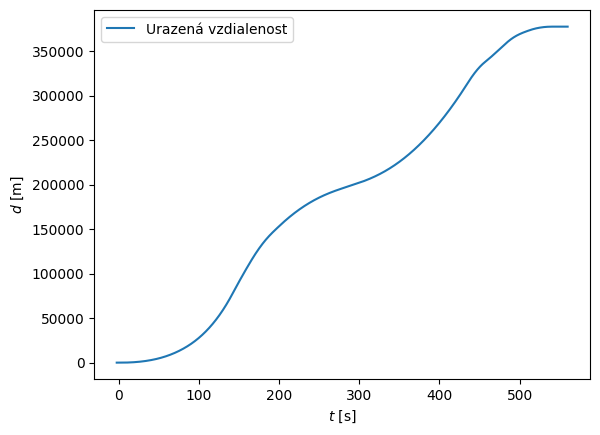

In [ ]:
#Graf urazenej vzdialenosti v závislosti od času

plt.plot(telemetry_data["Time"], telemetry_data["Distance"], label = "Urazená vzdialenost")

plt.xlabel("$t$ [s]")
plt.ylabel("$d$ [m]")

plt.legend()

Z nášho snaženia vidíme, že raketa za necelých 10 minút dokázala uraziť takmer 380 kilometrov!

## Zrýchlenie prvého stupňa rakety Falcon 9

Zrýchlenie môžeme vypočítať ako zmenu rýchlosti $\Delta v$ za nejaký časový interval $\Delta t$ takto

\begin{equation*}
 a = \frac{\Delta v}{\Delta t}.
\end{equation*}

Naše dáta bohužiaľ nie sú čisté. Keď sa pozrieme na naše dáta o rýchlosti zblízka, tak zistíme, že naše "rozlíšenie" rýchlosti je 1 m/s. To bohužiaľ nie je dosť na to, aby sme mohli dobre určiť zrýchlenie. Prečo? Pri pohľade na dáta je možné vidieť, že rýchlosť sa na čas zasekne na jednej hodnote predtým, než sa zvýši/zníži. To je práve dané malým rozlíšením rýchlosti.

Pomôžeme si tým, že zväčšíme časový interval $\Delta t$ tak, aby počas neho zmenila rýchlosť rakety. Toto zväčšenie intervalu kým sa nezmení hodnota rýchlosti je implementované v kóde nižšie.

In [ ]:
telemetry_data["Acceleration"] = 0 #Vytvorenie nového stĺpca na zrýchlenie
current_speed = 0 #Pomocná premenná pre súčasnú rýchlosť
interval_time = 0 #Dĺžka časového intervalu
help_index = 0 #Pomocný index, ktorý určuje začiatok intervalu

for i in range(1,len(telemetry_data)): #Vypočítanie zrýchlenia pre jednotlivé predĺžené intervaly
    if telemetry_data.loc[i, "Speed"] == current_speed:
        interval_time += telemetry_data.loc[i, "Time"] - telemetry_data.loc[i-1, "Time"]
    else:
        acc = (telemetry_data.loc[i, "Speed"] - current_speed)/(telemetry_data.loc[i, "Time"] - telemetry_data.loc[help_index, "Time"])
        for j in range(help_index,i):
            telemetry_data.loc[j, "Acceleration"] = acc
        current_speed = telemetry_data.loc[i, "Speed"]
        help_index = i

C:\Users\aminnakh\AppData\Local\Temp\ipykernel_31228\1080357081.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.22026431718061673' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  telemetry_data.loc[j, "Acceleration"] = acc


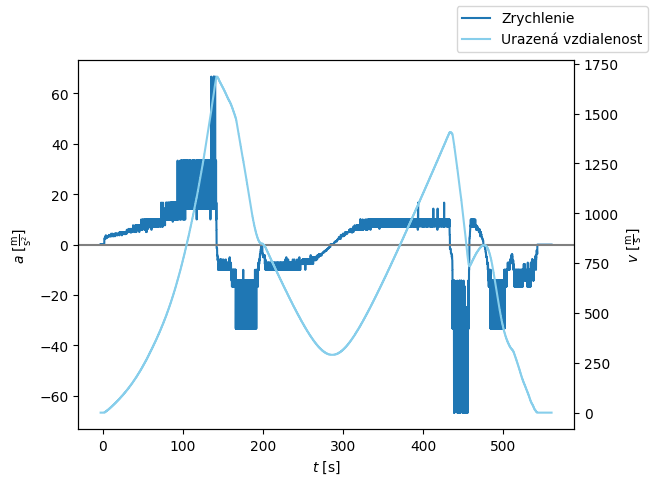

In [ ]:
#Graf zrýchlenie a rýchlosti rakety v závislosti od času

fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(telemetry_data["Time"], telemetry_data["Acceleration"], label = "Zrychlenie")
ax2.plot(telemetry_data["Time"], telemetry_data["Speed"], label = "Urazená vzdialenost", c = "skyblue")

ax1.axhline(0, color = "gray")

ax1.set_xlabel("$t$ [s]")
ax1.set_ylabel(r"$a$ [$\frac{\text{m}}{\text{s}^2}$]")
ax2.set_ylabel(r"$v$ [$\frac{\text{m}}{\text{s}}$]")

fig1.legend()

Ako vidíme, náš graf zrýchlenia nie je príliš "fyzikálne" vyzerajúca funkcia. To je dané práve tým, že naše dáta o rýchlosti rakety majú nedostatočné rozlíšenie. Náš graf ale stále správne ukazuje časové úseky, v ktorých sa raketa urýchľuje (myslené tak, že sa zväčšuje veľkosť rýchlosti) a kedy spomaľuje (zmenšuje sa veľkosť rýchlosti).

In [ ]:
# Uloženie dát na ďalšie spracovanie v úlohe 2 (tá bola dočasne vyradená zo zonamu, môžete krok preskočiť)
telemetry_data.to_csv("data_uloha_2.csv", index = False)

### Pomocný obrázok ku "schodom"

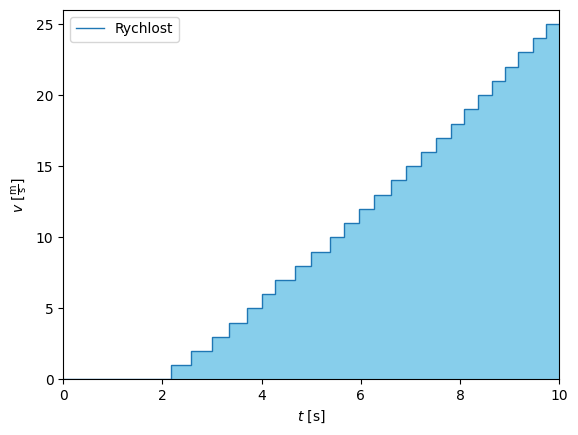

In [ ]:
#graf rychlosti v závislosti na čase

plt.stairs(telemetry_data.loc[range(0,400), "Speed"], telemetry_data.loc[range(0,401),"Time"], fill=True, color = "skyblue")
plt.stairs(telemetry_data.loc[range(0,400), "Speed"], telemetry_data.loc[range(0,401),"Time"], label = "Rychlost")
plt.xlabel("$t$ [s]")
plt.ylabel(r"$v$ [$\frac{\text{m}}{\text{s}}$]")

plt.xlim(0,10)
plt.ylim(0,26)

plt.legend()

plt.savefig("01_schody.svg")